## IBM Machine Learning Course Lab 3 - Polynomial Regression

This is my own attempt at Lab 3 of 'Machine Learning with Python' by IBM on Coursera. It includes my own insight when solving problems. The method of analysis presented here is far more rigorous than that required by the course.

In [4]:
""" importing necessary packages """
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as pl
from scipy.stats import pearsonr
%matplotlib inline


In [2]:
""" getting data and importing it into a pd dataframe"""

#obtain data (requires wget, $ brew install wget)
!wget -O FuelData.csv \
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

df = pd.read_csv('FuelData.csv')
df.head() #check data uploaded

--2020-07-23 15:18:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelData.csv’

FuelData.csv        100%[===================>]  70.93K   138KB/s    in 0.5s    

2020-07-23 15:18:40 (138 KB/s) - ‘FuelData.csv’ saved [72629/72629]



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data exploration

Let's explore if there is any nonlinearity in our data. What would happen if we plotted engine size vs. CO2 Emissions?

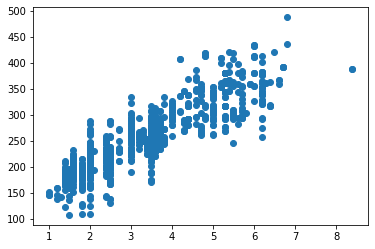

(0.8741543683958123, 0.0)


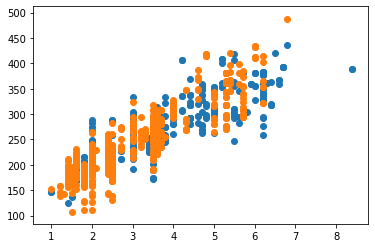

In [18]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS)
#note that the fuel combustion for city and highway are also being considered as predictors
plt.show()
"""This data does not appear to be particularly non-linear. Let's look at the correlation coefficient"""

print(pearsonr(df.ENGINESIZE, df.CO2EMISSIONS))

#the pearson coefficient shows a fairly 'linear' correlatoin too. Not convinced. Can we plot it differently
#for different fuel types following last lab's exploration?

colors = ['blue','green']

X = df[['ENGINESIZE']].loc[df['FUELTYPE']=='Z']
Y = df[['CO2EMISSIONS']].loc[df['FUELTYPE']=='Z']
plt.scatter(X,Y)
X = df[['ENGINESIZE']].loc[df['FUELTYPE']!='Z']
Y = df[['CO2EMISSIONS']].loc[df['FUELTYPE']!='Z']
plt.scatter(X,Y)

#as we can see, fuel type does not particularly introduce any non-linearity in the model...

#let's model it linearly first, then see if the quadratic model will cause an improvement or not

## Modelling and model evaluation

In [33]:
# import modelling related modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PolynomialFeatures as pf
#import evaluation related modules
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score






0.7644809223805962
955.3707648173709


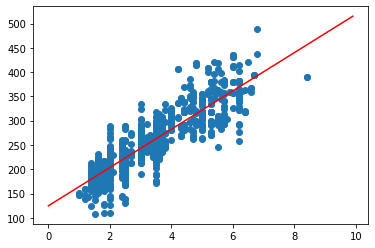

[130.10542265]
[[ 0.         28.75403144  4.54675323 -0.50132461]]
0.765737209847907
950.2747007082254


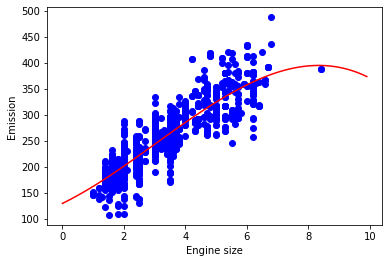

In [79]:
X = np.asanyarray(df[['ENGINESIZE']]) #X capital as it's multivariate
y = np.asanyarray(df[['CO2EMISSIONS']]) #still unsure what asanyarray does...?

x_train, x_test, y_train, y_test = tts(X , y,test_size = 0.2, random_state = 1) 
#remember random state is the seed

lm = LinearRegression() #make linear regression object
lm.fit(x_train,y_train)

y_hat = lm.predict(x_test)

#metrics:
print(r2_score(y_test,y_hat))
print(mse(y_test,y_hat))

#the error is quite high, and the linear fit could be improved, let's plot how this looks like.
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
XX = np.arange(0.0, 10.0, 0.1)
yy = lm.intercept_[0]+ lm.coef_[0]*XX
plt.plot(XX, yy, '-r' )
plt.show()

""" let's look what a transformation will do to our data"""
poly = pf(degree = 3) 
train_x_trans = poly.fit_transform(x_train)

lm = LinearRegression()
lm.fit(train_x_trans,y_train)

print(lm.intercept_)
print(lm.coef_)

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lm.intercept_[0]+ lm.coef_[0][1]*XX+ lm.coef_[0][2]*np.power(XX, 2)+ lm.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")


#not sure I fully understand what I'm doing, something is missing. 

y_hat = lm.predict(poly.fit_transform(x_test))
print(r2_score(y_test,y_hat))
print(mse(y_test,y_hat)) #I believe that my fit and sketches are correct, what is wrong is the metrics...

#apparenlty, they are quite close in accuray... how about we try with a 3rd order poly?

## Conclusion

Need to come back to this, I need more practice with polynomial regression. The principle is fairly easy to understand, I must get used to using Python.